<a href="https://colab.research.google.com/github/sakaxo/tensorflow_with_django_model_notebook/blob/master/animal_classification_note_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import Project Dependancies***

In [311]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [312]:
data_dir = "/content/dataset"

In [313]:
class_names = ['cat','dog','parrot']
img_size = 100

In [314]:
data = []

 **Prepare Dataset**




In [315]:
for animal in class_names:
  class_path = os.path.join(data_dir,animal)
  label = class_names.index(animal)
  for img in os.listdir(class_path):
    img_path = os.path.join(class_path,img)

    img_arr = cv2.imread(img_path,0) #load image and convert to gray scale (0)
    img_arr = cv2.resize(img_arr,(img_size,img_size)) # resize every image to size (img_size,img_size)

    # data
    data.append([img_arr,label])
  


In [316]:
random.shuffle(data)
X = []
y = []

In [317]:
for feature,label in data:
  X.append(feature)
  y.append(label)

**Save Prepared data to memory**

In [318]:
pickle.dump(X,open('train_X.pkl','wb'))
pickle.dump(y,open('train_y.pkl','wb'))

**Load saved data from memory**

In [319]:
X_train = pickle.load(open('train_X.pkl','rb'))
y_train = pickle.load(open('train_y.pkl','rb'))


# **Data list to numpy array**

In [320]:
X = np.array(X_train)
y = np.array(y_train)

In [321]:
X.max()

255

In [322]:
# scale features
X = X/255.0


In [323]:
X.max()

1.0

# **Build and Train Model**

**Build model**
[Old model]

In [324]:
print(img_size)

100


In [325]:
model = keras.Sequential(name="Sequential_1")
model.add(layers.Flatten(input_shape=(img_size,img_size), name="Flatten_layer"))
model.add(layers.Dense(32, activation="relu", name="layer_1"))
model.add(layers.Dense(32, activation="relu", name="layer_2"))
model.add(layers.Dense(3, activation="softmax", name="layer_3"))



**Compile built model**
[old model]

In [326]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train model**
[old model]

In [327]:
model.fit(X, y, epochs=10,validation_split=0.2,)

Epoch 1/10
45/45 [==============================] - 1s 11ms/step - loss: 1.2318 - accuracy: 0.3785 - val_loss: 1.0562 - val_accuracy: 0.4278
Epoch 2/10
45/45 [==============================] - 0s 8ms/step - loss: 1.1151 - accuracy: 0.4306 - val_loss: 1.1304 - val_accuracy: 0.3583
Epoch 3/10
45/45 [==============================] - 0s 8ms/step - loss: 1.0837 - accuracy: 0.4264 - val_loss: 1.1940 - val_accuracy: 0.4417
Epoch 4/10
45/45 [==============================] - 0s 8ms/step - loss: 1.0665 - accuracy: 0.4743 - val_loss: 1.0458 - val_accuracy: 0.4750
Epoch 5/10
45/45 [==============================] - 0s 10ms/step - loss: 1.0866 - accuracy: 0.4694 - val_loss: 1.1126 - val_accuracy: 0.3639
Epoch 6/10
45/45 [==============================] - 0s 10ms/step - loss: 1.0519 - accuracy: 0.4771 - val_loss: 1.0585 - val_accuracy: 0.4778
Epoch 7/10
45/45 [==============================] - 0s 10ms/step - loss: 1.0379 - accuracy: 0.4688 - val_loss: 1.0521 - val_accuracy: 0.4389
Epoch 8/10
45/45

## **Convnet model**

**Build model**


In [328]:
print(img_size)

100


In [329]:
modelC = keras.Sequential(name ="convModel")

modelC.add(layers.Conv2D(124, (3, 3), activation='relu', input_shape=(img_size,img_size,1), name="Conv1")) 
modelC.add(layers.MaxPooling2D((2, 2), name='maxpool1'))
modelC.add(layers.Dropout(0.2, name='dropout1'),)

modelC.add(layers.Conv2D(64, (3, 3), activation='relu', name="Conv2"))
# modelC.add(layers.Dropout(0.2, name='dropout2'),)
modelC.add(layers.MaxPooling2D((2, 2), name='maxpool2'))

modelC.add(layers.Conv2D(32, (3, 3), activation='relu', name="Conv3"))
modelC.add(layers.MaxPooling2D((2, 2), name='maxpool3'))
modelC.add(layers.Dropout(0.2, name='dropout3'),)

modelC.add(layers.Flatten(name="Flatten"))

modelC.add(layers.Dense(64, activation='relu', name='Dense1'))
# modelC.add(layers.Dropout(0.1, name='dropout4'),)
model.add(layers.Dense(32, activation='relu', name='Dense2'))

modelC.add(layers.Dense(3,activation='softmax', name='outputDense'))

In [330]:
modelC.summary()

Model: "convModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 98, 98, 124)       1240      
                                                                 
 maxpool1 (MaxPooling2D)     (None, 49, 49, 124)       0         
                                                                 
 dropout1 (Dropout)          (None, 49, 49, 124)       0         
                                                                 
 Conv2 (Conv2D)              (None, 47, 47, 64)        71488     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 23, 23, 64)        0         
                                                                 
 Conv3 (Conv2D)              (None, 21, 21, 32)        18464     
                                                                 
 maxpool3 (MaxPooling2D)     (None, 10, 10, 32)        0 

**Model compilation**

In [331]:
modelC.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train model ( model fitting )**

In [332]:
history=modelC.fit(X, y, epochs=20,validation_split=0.2,)

Epoch 1/20
45/45 [==============================] - 53s 1s/step - loss: 1.1020 - accuracy: 0.3438 - val_loss: 1.0979 - val_accuracy: 0.3556
Epoch 2/20
45/45 [==============================] - 51s 1s/step - loss: 1.0775 - accuracy: 0.4083 - val_loss: 0.9921 - val_accuracy: 0.5083
Epoch 3/20
45/45 [==============================] - 49s 1s/step - loss: 0.9931 - accuracy: 0.5028 - val_loss: 0.9472 - val_accuracy: 0.5444
Epoch 4/20
45/45 [==============================] - 51s 1s/step - loss: 0.9399 - accuracy: 0.5562 - val_loss: 0.9186 - val_accuracy: 0.5500
Epoch 5/20
45/45 [==============================] - 49s 1s/step - loss: 0.8731 - accuracy: 0.5833 - val_loss: 0.8959 - val_accuracy: 0.5500
Epoch 6/20
45/45 [==============================] - 51s 1s/step - loss: 0.8129 - accuracy: 0.6278 - val_loss: 0.8986 - val_accuracy: 0.5361
Epoch 7/20
45/45 [==============================] - 51s 1s/step - loss: 0.7542 - accuracy: 0.6444 - val_loss: 0.8641 - val_accuracy: 0.6028
Epoch 8/20
45/45 [==

**Plot of model performance**

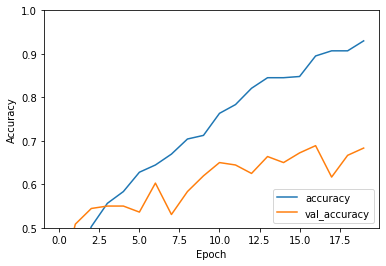

In [333]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [334]:
model.save('model.h5')